# Practical No. 3
**Aim:** Implementation of Linear Regression, Logistic regression, KNN- classification

**Theory:**<br>
Linear regression is a widely used statistical technique for modeling the relationship between a dependent variable and one or more independent variables. It aims to find a linear equation that best describes the linear association between the input variables and the target variable.

Here's an overview of linear regression:

1. Simple Linear Regression: In simple linear regression, there is a single independent variable (also called a predictor or feature) that is used to predict the value of a single dependent variable. The relationship between the independent and dependent variables is assumed to be linear. The equation of a simple linear regression model is of the form: 
   `Y = b0 + b1*X + epsilon`
   where Y is the dependent variable, X is the independent variable, b0 and b1 are the coefficients (intercept and slope), and epsilon represents the error term.

2. Multiple Linear Regression: Multiple linear regression extends simple linear regression to include more than one independent variable. It allows modeling the relationship between a dependent variable and multiple predictors. The equation of a multiple linear regression model is of the form:
   `Y = b0 + b1*X1 + b2*X2 + ... + bn*Xn + epsilon`
   where Y is the dependent variable, X1, X2, ..., Xn are the independent variables, b0, b1, b2, ..., bn are the coefficients, and epsilon represents the error term.

3. Assumptions: Linear regression makes several assumptions, including linearity (the relationship between variables is linear), independence of errors (the errors are not correlated), homoscedasticity (constant variance of errors), and normality of errors (errors are normally distributed).

4. Training the Model: To train a linear regression model, we use a training dataset that consists of input variables and corresponding target variable values. The model estimates the coefficients (b0, b1, ..., bn) that minimize the sum of squared differences between the predicted and actual target variable values.

5. Evaluation: Linear regression models are evaluated using various metrics, such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), coefficient of determination (R-squared), and others. These metrics help assess the goodness of fit and the predictive performance of the model.

6. Extensions and Variations: There are several variations of linear regression, such as polynomial regression (where the relationship is modeled using polynomial functions), ridge regression (which adds a regularization term to handle multicollinearity), lasso regression (which performs variable selection and regularization), and others.

7. Implementation: Linear regression can be implemented using various libraries in Python, such as NumPy, Pandas, and scikit-learn. These libraries provide convenient functions to fit the model, make predictions, and evaluate the performance of the linear regression models.

Linear regression is a fundamental and versatile technique in data analysis and machine learning. It has applications in various domains, including finance, economics, social sciences, and more.

## Single Linear Regression

Mean Squared Error: 1.2923314440807299


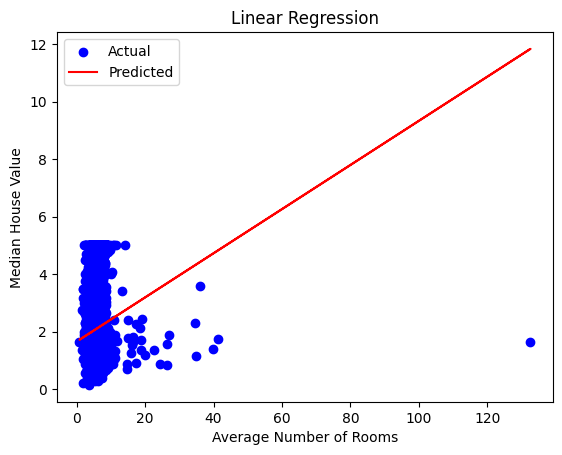

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

# Prepare the data
X = data[['AveRooms']].values  # Use the 'AveRooms' feature (average number of rooms) as input
y = target.values.reshape(-1, 1)  # Use the target feature (median house value) as output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.scatter(X_test, y_test, color='b', label='Actual')
plt.plot(X_test, y_pred, color='r', label='Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')
plt.title('Linear Regression')
plt.legend()
plt.show()


## Logistic Regression

**Theory:**<br>
Logistic regression is a popular statistical and machine learning algorithm used for binary classification. It is an extension of linear regression that models the probability of an instance belonging to a particular class. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability of an instance belonging to a certain class.

Here's an overview of logistic regression:

1. Binary Logistic Regression: In binary logistic regression, the dependent variable (target variable) has two categories or classes (e.g., 0 and 1, false and true). The goal is to estimate the probability of an instance belonging to the positive class (class 1) given the predictor variables. The logistic regression model applies a logistic function (sigmoid function) to the linear combination of the predictors to map the output to a probability between 0 and 1.

2. Logistic Function (Sigmoid): The logistic function, also known as the sigmoid function, is used to transform the linear combination of predictors into a value between 0 and 1. The sigmoid function is defined as:
   `p = 1 / (1 + exp(-z))`
   where p is the predicted probability, z is the linear combination of predictors.

3. Model Training: Logistic regression models are trained using a labeled dataset, where the input variables (predictors) and corresponding target variable (binary outcome) are known. The model estimates the coefficients (weights) that maximize the likelihood of the observed data given the model assumptions.

4. Coefficients and Interpretation: The coefficients obtained from logistic regression represent the impact of the predictors on the log-odds of the positive class. They provide information about the direction and magnitude of the relationship between the predictors and the probability of the positive class.

5. Decision Threshold: Logistic regression outputs probabilities, and a decision threshold is used to determine the predicted class labels. By default, a threshold of 0.5 is often used, meaning that instances with predicted probabilities above 0.5 are classified as the positive class, and those below 0.5 are classified as the negative class. However, the decision threshold can be adjusted based on the specific requirements and trade-offs.

6. Evaluation: Logistic regression models are evaluated using various metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). These metrics assess the performance and predictive capability of the model on both training and test data.

7. Extensions and Variations: Logistic regression can be extended to handle multiclass classification problems using techniques like one-vs-rest (OvR) or softmax regression. Additionally, regularized logistic regression methods, such as ridge regression and lasso regression, can be used to handle multicollinearity and perform feature selection.

8. Implementation: Logistic regression can be implemented using libraries such as NumPy, Pandas, and scikit-learn in Python. These libraries provide convenient functions for fitting the model, making predictions, and evaluating the performance of logistic regression models.

Logistic regression is widely used in various fields, including healthcare, finance, marketing, and social sciences. It provides a simple yet effective approach for binary classification problems where the goal is to predict the probability of an instance belonging to a particular class.

Accuracy: 1.0
Confusion Matrix:
[[10  0]
 [ 0 20]]


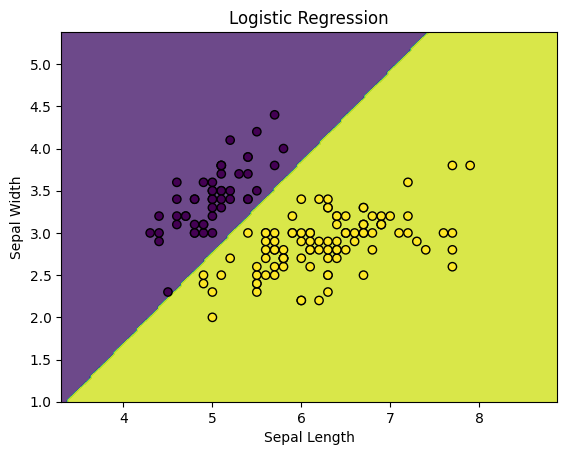

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Prepare the data
X = data[:, :2]  # Use the first two features (sepal length and sepal width) as input
y = (target != 0).astype(int)  # Convert target values to binary (1 if not Iris-setosa, 0 otherwise)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression')
plt.show()


## KNN-Classification
**Theory:**<br>
K-Nearest Neighbors (KNN) classification is a popular and simple machine learning algorithm used for both classification and regression tasks. KNN is a non-parametric algorithm that makes predictions based on the similarity between the input data and the labeled training instances.

Here's an overview of KNN classification:

1. Working Principle: KNN classification works based on the assumption that similar instances tend to have similar class labels. The algorithm stores the entire training dataset in memory and makes predictions by finding the K nearest neighbors of a given test instance. The majority class among the K nearest neighbors is assigned as the predicted class for the test instance.

2. Distance Metric: KNN uses a distance metric (such as Euclidean distance) to measure the similarity between instances. The choice of distance metric depends on the nature of the data and the problem at hand.

3. Choosing the Value of K: The value of K is a hyperparameter in KNN that determines the number of neighbors considered for classification. It should be chosen carefully as it can affect the algorithm's performance. A small K value may lead to overfitting and noise sensitivity, while a large K value may lead to oversmoothing and loss of local patterns.

4. Training and Prediction: KNN does not involve explicit model training. During the prediction phase, KNN finds the K nearest neighbors to the test instance based on the chosen distance metric. The predicted class is determined by majority voting among the K neighbors.

5. Scaling of Features: It is generally recommended to scale the features before applying KNN, as features with larger scales can dominate the distance calculations. Common scaling techniques include normalization (scaling features between 0 and 1) or standardization (scaling features to have zero mean and unit variance).

6. Evaluation: KNN models can be evaluated using various performance metrics, including accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). Additionally, techniques like cross-validation can be used to estimate the model's performance on unseen data.

7. Implementation: KNN classification can be implemented using libraries such as NumPy, Pandas, and scikit-learn in Python. The scikit-learn library provides a KNeighborsClassifier class that offers flexibility in choosing the distance metric, number of neighbors (K), and other hyperparameters.

KNN classification is a simple yet powerful algorithm that is often used as a baseline model for classification tasks. It is especially effective when the decision boundaries are complex or when there is a large amount of training data available. However, it can be computationally expensive for large datasets, and the choice of K and the distance metric can significantly impact the algorithm's performance.

Accuracy: 0.8333333333333334
Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


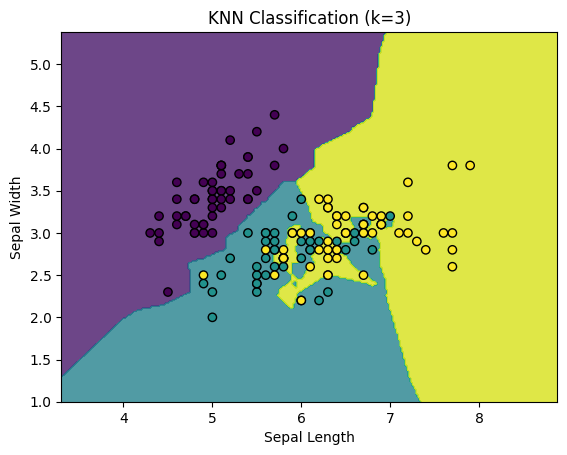

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Prepare the data
X = data[:, :2]  # Use the first two features (sepal length and sepal width) as input
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
k = 3  # Number of neighbors to consider
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'KNN Classification (k={k})')
plt.show()
